Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object
Rows with invalid dates:                                Region          Country        Item Type  \
2                              Europe           Russia  Office Supplies   
4                  Sub-Saharan Africa           Rwanda  Office Supplies   
5               Australia and Oceania  Solomon Islands        Baby Food   
11                 Sub-Saharan Africa       Cape Verde          Clothes   
13  Central America and the Caribbean         Honduras        Household   
17                 Sub-Saharan Africa         Cameroon        Beverages   
23              Australia and Oceania      New Zealand           Fruits 

C:\Users\micha\AppData\Local\Temp\ipykernel_21924\1456623692.py:19: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)


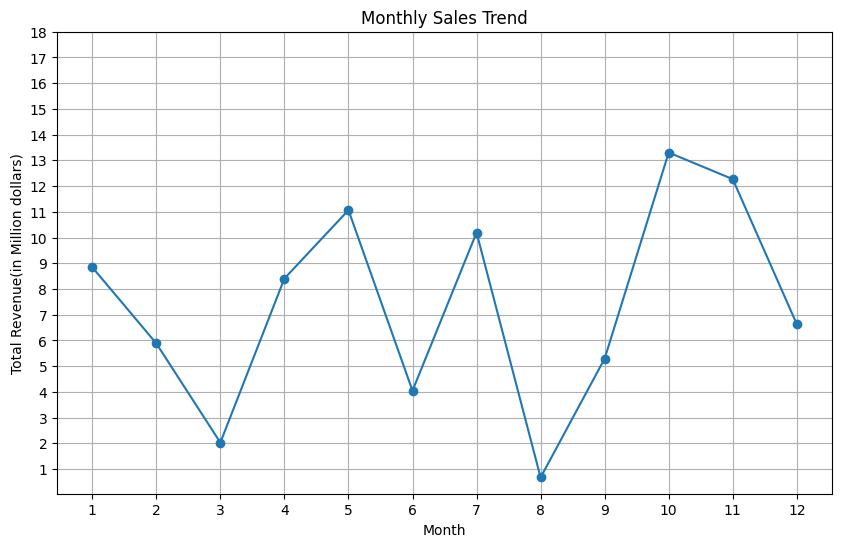

Yearly Sales Trend:
Order Date
2010.0    15721044.54
2011.0     6467026.68
2012.0    21381059.75
2013.0    10611609.44
2014.0     5329670.94
2015.0    11411126.64
2016.0    11112369.94
2017.0     6606141.13
Name: Total Revenue, dtype: float64


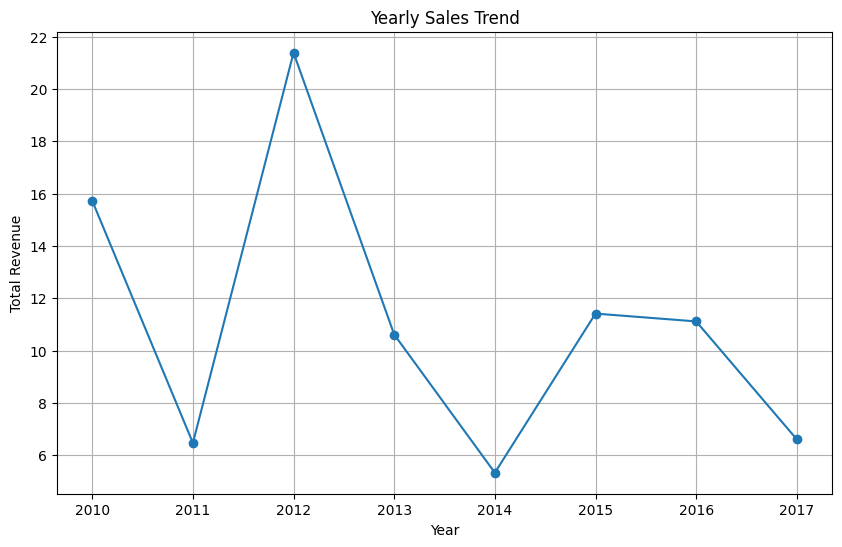

Yearly Monthly Sales Trend:
Order Date        1.0         2.0        3.0         4.0         5.0   \
Order Date                                                              
2010.0             NaN         NaN        NaN         NaN  2533654.00   
2011.0       418936.05         NaN        NaN  2798046.49   272410.45   
2012.0             NaN  3121244.33  994765.42   187695.70  3782781.82   
2013.0             NaN         NaN  835759.10  3262562.10         NaN   
2014.0             NaN   400558.73        NaN  1356180.10  1901836.00   
2015.0      5513227.50  1244708.40        NaN   802333.76         NaN   
2016.0             NaN         NaN  197883.40         NaN         NaN   
2017.0      2914130.27  1117953.66        NaN         NaN  2574057.20   

Order Date        6.0         7.0        8.0         9.0         10.0  \
Order Date                                                              
2010.0      1082418.40         NaN        NaN         NaN  6064933.75   
2011.0        19103.44

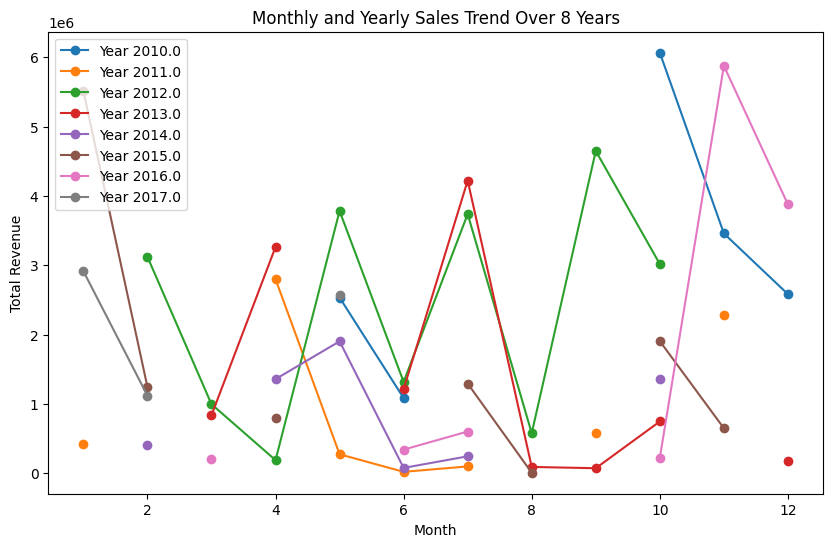

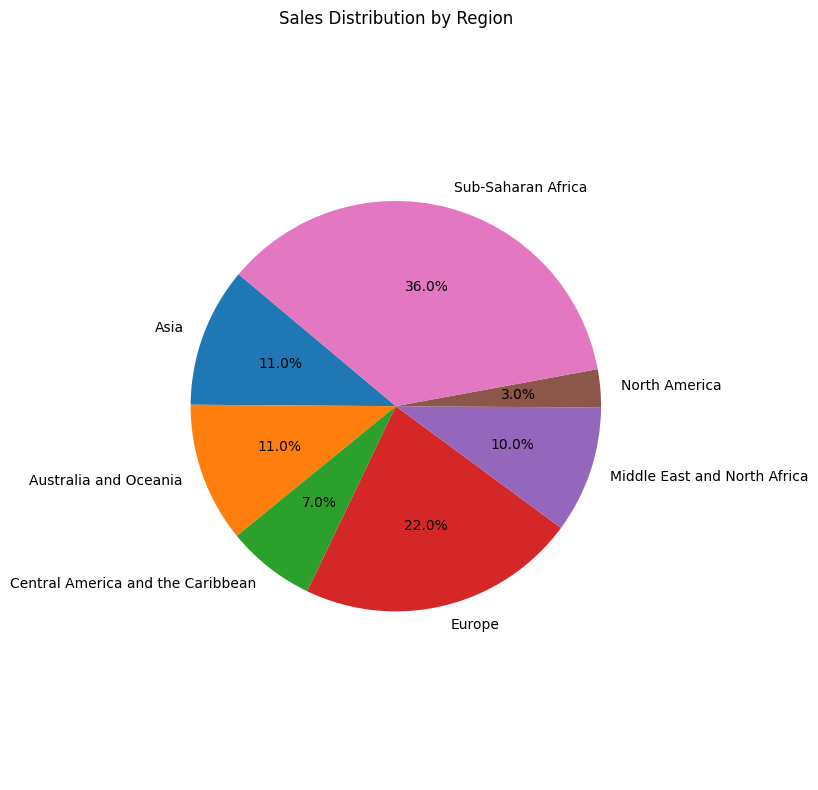

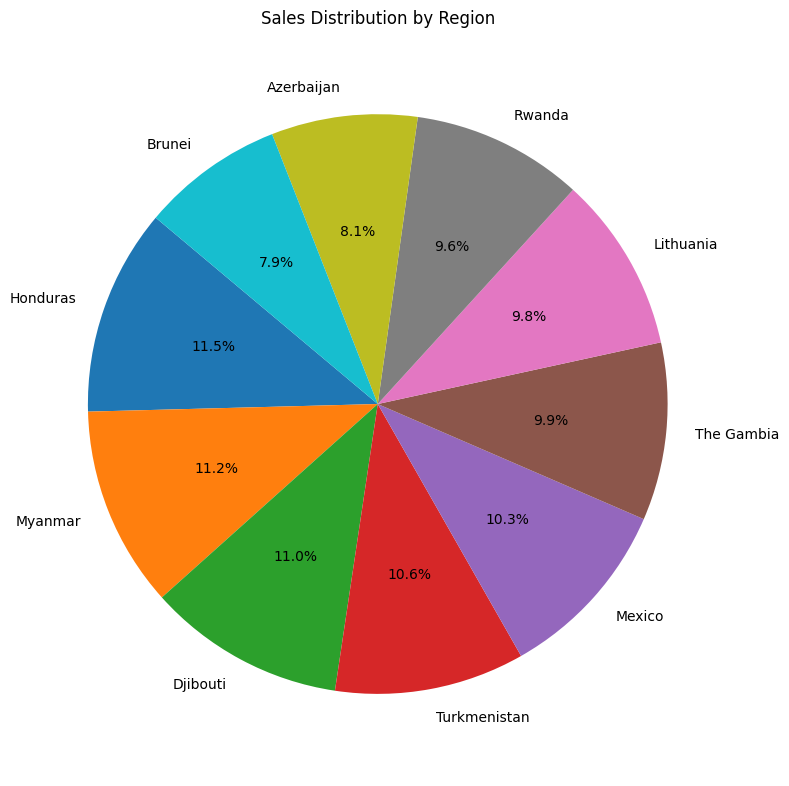

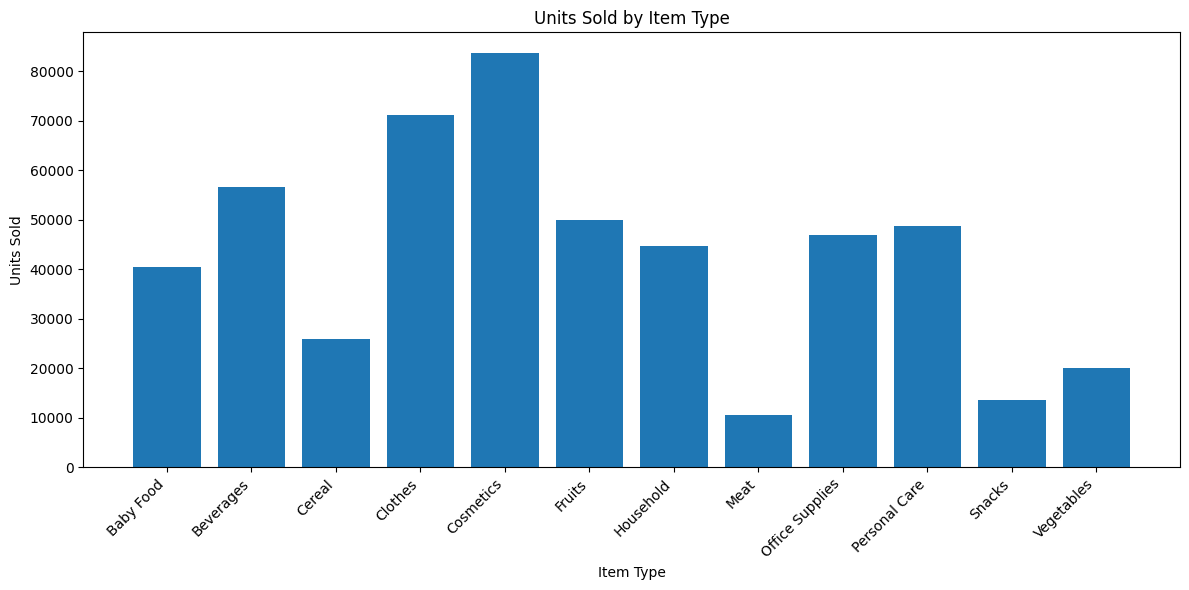

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("D:\Downloads feom c\Downloads\Amazon Sales Price Prediction\Amazon Sales data.csv")
df

df.shape

df.columns.values

df.isna().sum()

df.describe()

data_types=df.dtypes
print(data_types)

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)

if df['Order Date'].isna().sum() > 0:
    print(f"Rows with invalid dates: {df[df['Order Date'].isna()]}")





monthly_sales = df.groupby(df['Order Date'].dt.month)['Total Revenue'].sum()
print("Monthly Sales Trend:")
print(monthly_sales)

monthly_sales_millions = monthly_sales / 1000000
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index,monthly_sales_millions.values,marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Revenue(in Million dollars)')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.xticks(range(1,13))
plt.yticks(range(1,19))
plt.show()

yearly_sales = df.groupby(df['Order Date'].dt.year)['Total Revenue'].sum()
print("Yearly Sales Trend:")
print(yearly_sales)

yearly_sales_millions=yearly_sales/1000000
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales_millions.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Sales Trend')
plt.grid(True)
plt.show()


yearly_monthly_sales = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Total Revenue'].sum().unstack()
print("Yearly Monthly Sales Trend:")
print(yearly_monthly_sales)

fig, ax = plt.subplots(figsize=(10, 6))
for year in yearly_monthly_sales.index:
    yearly_monthly_sales.loc[year].plot(ax=ax, label=f'Year {year}', marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
ax.set_title('Monthly and Yearly Sales Trend Over 8 Years')
ax.legend()
plt.show()

region_trends = df.groupby('Region')['Total Revenue'].size().reset_index()
region_trends

plt.figure(figsize=(8, 8))
plt.pie(region_trends['Total Revenue'],labels=region_trends['Region'], autopct="%1.1f%%", startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()


country_sales = df.groupby('Country')['Total Revenue'].sum().reset_index()
top_10_countries=country_sales.sort_values(by='Total Revenue', ascending=False).head(10)
top_10_countries

plt.figure(figsize=(8, 8))
plt.pie(top_10_countries['Total Revenue'], labels=top_10_countries['Country'], autopct="%1.1f%%", startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()






Item_sales = df.groupby('Item Type')['Units Sold'].sum().reset_index()
Item_sales

plt.figure(figsize=(12, 6))
plt.bar(Item_sales['Item Type'], Item_sales['Units Sold'])
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.title('Units Sold by Item Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
